In [10]:
# Import stuff
import os
import scipy
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt
import theano
import numpy as np

In [2]:
"""
Assuming mean firing for a set of neurons
For each neuron, firing in a state is taken from the distrubution of mean firing
Multiple trials are instances of activity in each state strung together
"""

'\nAssuming mean firing for a set of neurons\nFor each neuron, firing in a state is taken from the distrubution of mean firing\nMultiple trials are instances of activity in each state strung together\n'

In [3]:
nrns = 5
states = 3
trials = 10

In [14]:
with pm.Model() as model:
    a_lambda = 2
    b_lambda = 5
    
    lambda_nrn = pm.Beta('lambda_nrns', a_lambda, b_lambda, shape = nrns)
    lambda_latent = pm.Beta('lambda', mu = lambda_nrn, 
                            sigma = np.broadcast_to(0.1,nrns),
                            shape = nrns)

In [15]:
# Sample for longer but thin trace at end
with model:
    trace = pm.sample(2500, tune=250)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda, lambda_nrns]
Sampling 4 chains, 2,992 divergences: 100%|██████████| 22000/22000 [00:33<00:00, 650.34draws/s] 
There were 699 divergences after tuning. Increase `target_accept` or reparameterize.
There were 891 divergences after tuning. Increase `target_accept` or reparameterize.
There were 741 divergences after tuning. Increase `target_accept` or reparameterize.
There were 661 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


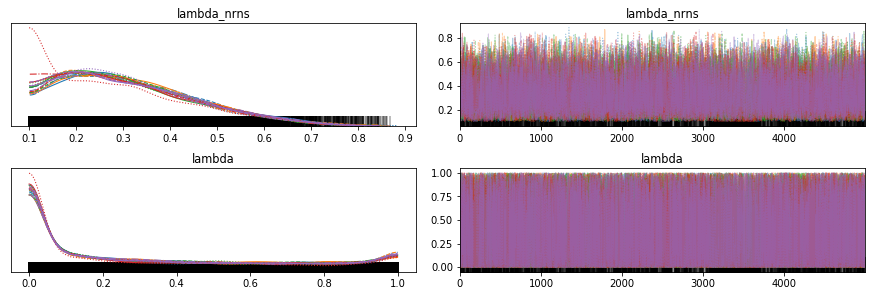

In [16]:
pm.traceplot(trace);

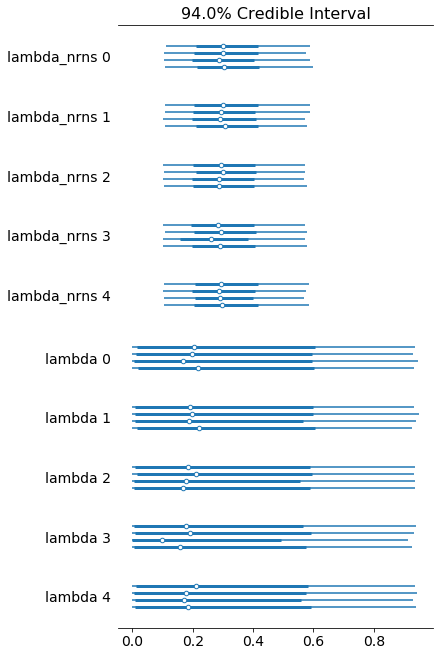

In [17]:
pm.forestplot(trace);